# Παραδοτέο 1

Στο παρακάτω κελί κώδικα, φαίνεται η διαδικασία υπολογισμού του εκτιμώμενου όγκου, με Monte Carlo, της μοναδιαίας μπάλας $d$ διαστάσεων. Έπειτα, συγκρίνεται με τον θεωρητικά υπολογισμένο όγκο, και υπολογίζεται το σχετικό σφάλμα εκτίμησης. Η διαδικασία $vol(N,d)$, τερματίζει όταν κανένα από τα $Ν$ δείγματα δεν βρίσκεται μέσα στη μπάλα, δηλαδή όταν $nhits == 0$, οπότε και $vol(N,d) == 0$ και άρα τερματίζει όταν βρει μηδενική εκτίμηση όγκου. 

Στο ίδιο κελί κώδικα φαίνεται και το αντίστοιχο plot για τα δεδομένα $d - logp(d)$. Βλέπουμε ότι αύξηση της διάστασης συνεπάγεται μείωση του $log p(d)$ και άρα και του $p(d)$, δηλαδή όσο αυξάνεται η διάσταση μειώνεται η πιθανότητα να πετύχουμε σημεία μέσα στη μοναδιαία μπάλα για $N$ αριθμό δειγμάτων, καθώς όπως αναφέρεται και στην εκφώνηση της άσκησης, σε μεγάλες διαστάσεις τα σημεία του μοναδιαίου κύβου τείνουν να συσσωρρεύονται στις γωνίες του. 

Προφανώς, επειδή η θεωρητική τιμή του όγκου, ως τιμή, αυξάνεται πιο γρήγορα από την εκτίμηση του όγκου όσο αυξάνεται η διάσταση, το σχετικό σφάλμα αυξάνεται όσο αυξάνεται η διάσταση. Αυτό οφείλεται και στο επιχείρημα που παρουσιάσαμε παραπάνω για τα δείγματα που λαμβάνουμε όσο αυξάνουν οι διαστάσεις. 

The Monte Carlo estimate of ω( 2 ) is  : 3.14196 
The actual value of ω( 2 ) is  : 3.14159 
The relative error is 0.01182%
The Monte Carlo estimate of ω( 3 ) is  : 4.19163 
The actual value of ω( 3 ) is  : 4.18879 
The relative error is 0.06784%
The Monte Carlo estimate of ω( 4 ) is  : 4.94570 
The actual value of ω( 4 ) is  : 4.93480 
The relative error is 0.22075%
The Monte Carlo estimate of ω( 5 ) is  : 5.23693 
The actual value of ω( 5 ) is  : 5.26379 
The relative error is 0.51030%
The Monte Carlo estimate of ω( 6 ) is  : 5.19866 
The actual value of ω( 6 ) is  : 5.16771 
The relative error is 0.59878%
The Monte Carlo estimate of ω( 7 ) is  : 4.67648 
The actual value of ω( 7 ) is  : 4.72477 
The relative error is 1.02198%
The Monte Carlo estimate of ω( 8 ) is  : 4.05478 
The actual value of ω( 8 ) is  : 4.05871 
The relative error is 0.09678%
The Monte Carlo estimate of ω( 9 ) is  : 3.30598 
The actual value of ω( 9 ) is  : 3.29851 
The relative error is 0.22662%
The Monte Carlo 

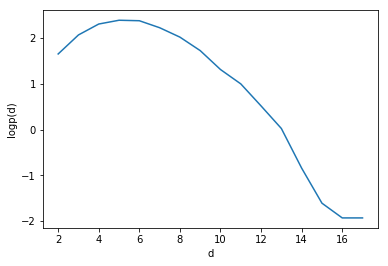

In [1]:
from numpy import random
from math import gamma, pi 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # initiate plots


ds = []
pds = []

def vol(N,d):
    nhits = 0
    for i in range(N):
        x = random.uniform(-1,1,d)
        if sum(x ** 2) < 1: 
            nhits += 1
    return 2 ** d * nhits / N

def Vol1(d):
    x = d/2
    return pi ** x / gamma(x + 1)

d = 2
N = 1000000
u = vol(N,d)

while (u > 0.0):
    ds.append(d)
    pds.append(u)
    print ("The Monte Carlo estimate of ω(", d,") is  : %.5f " % u)
    print("The actual value of ω(", d,") is  : %.5f " % Vol1(d))
    print("The relative error is %.5f%%" % (100 * abs(1- u/Vol1(d))))
    d = d+1
    u = vol(N,d)

x = np.array(ds)
y = np.array(pds)


logy = np.log2(y)
deg = np.polyfit(x, logy, 1)


plt.plot(x, logy, label="Results")
plt.xlabel("d")
plt.ylabel("logp(d)")
plt.show()

pass

In [15]:
import timeit

start = timeit.default_timer()

nhits = 0
counter = 0

while (nhits < 1):
    counter += 1
    x = random.uniform(-1,1,20)
    if sum(x ** 2) < 1: 
        nhits += 1

print ("Needed %d samples" % counter)
stop = timeit.default_timer()

print (stop - start) 


Needed 62453619 samples
383.3158243279904


Όπως φαίνεται στο παραπάνω κελί, χρειάστηκαν 383.32 seconds περίπου για να βρεθεί ένα σημείο που να ανήκει στη μοναδιαία μπάλα. Αυτό σημαίνει ότι, εφόσον τα $x$ που τραβήξαμε από τον μοναδιαίο κύβο επιλέγονται με uniform τρόπο, το να πετύχουμε σημείο μέσα στη μπάλα είναι ανεξάρτητο από το προηγούμενο σημείο, και έτσι συνολικά έχουμε ένα γινόμενο από χρόνους ανεξάρτητων ενδεχομένων. Έτσι, για να πετύχουμε 1000 σημεία, θα χρειαστούμε 383316 περίπου seconds. 

# Παραδοτέο 2

## Ερώτημα α)
Πολύ μικρή τιμή του delta συνεπάγεται ότι η uniform επιλογή γίνεται από ένα πολύ μικρό διάστημα, οπότε το βήμα είναι πολύ μικρό που παίρνουμε, και έτσι όλα τα δεδομένα σημεία στη μπάλα είναι συγκεντρωμένα σε μια πολύ μικρή περιοχή πολύ κοντά στο κέντρο. 

Αντιθέτως, μεγάλη τιμή του delta, δίνει μεγάλη περιοχή, οπότε τα δεδομένα τείνουν να συγκεντρώνονται στους άξονες, αφού η τιμή 20 είναι μεγαλύτερη από το πιθανό βήμα που μπορεί να γίνει εντός μπάλας και έτσι "κολλάει" στα x = 0, y = 0 πολύ συχνά.

Plot for delta = 1.00


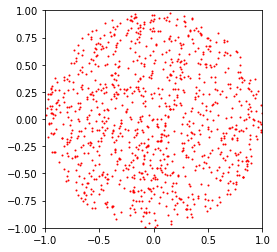

Plot for delta = 0.01


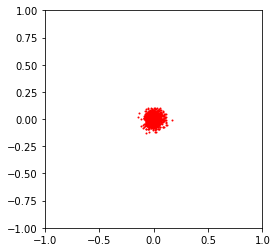

Plot for delta = 20.00


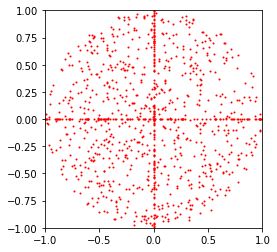

In [12]:
import random as r

deltas = [1.0, 0.01, 20]
N = 100 # number of steps to approach equilibrium
samples = 1000 

for delta in deltas:
    point_x = []
    point_y = []
    for _ in range(samples):
        x = [0,0]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it
    
        for _ in range(N):
            k = r.choice([0,1])  ## choose a jump direction at random
            z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
   
        point_x.append(x[0])
        point_y.append(x[1])
    
    fig, ax = plt.subplots()
    
    print ("Plot for delta = %.2f" % delta)

    plt.scatter(point_x, point_y, color = 'red', s = 1) 

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal') 

    plt.show()

## Ερώτημα β)

Η προσέγγιση που κάναμε βρίσκει με τον MCMC τρόπο d-1 στοιχεία, για την d-οστή διάσταση, και μετά με τον απλό τρόπο uniform επιλογής, με χρήση της random, βρίσκει το d-οστό στοιχείο. Κρατάμε τον αριθμό των nhits σε έναν πίνακα, και στον πίνακα data κρατάμε το γινόμενο $\frac{D_i}{C_i}$, δηλαδή πόσα στοιχεία από τα συνολικά δείγματα που εξετάσαμε ήταν μέσα στη μπάλα διαστάσεων d. Κατά τον τύπο της εκφώνησης, την τιμή αυτή πολλαπλασιάζουμε τελικά επί $2*D_{i-1}$ και βρίσκουμε τελικά τον όγκο $D_i$. 

In [51]:
import random as r
import numpy as np

delta = 1.0
d = 1
N = 100 # number of steps to approach equilibrium
samples = 1000 

nhits = np.zeros((100,), dtype=np.int)
data = np.zeros(101)


for d in range(2,100):
    nhits[d] = 0
    total = 1000
    for _ in range(samples):
        x = np.zeros((100,), dtype=np.int)
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it
    
        for _ in range(N):
            k = r.choice([0,d-1])  ## choose a jump direction at random
            z = np.random.uniform(-1,1) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                nhits[d] += 1
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
        
        summy = 0
        
        if d>1:
            for _ in range(d-1):
                summy += x[d]**2
            new_x = np.random.uniform(-1,1)
            while (summy+new_x**2 >= 1.0):
                new_x = np.random.uniform(-1,1)
                total += 1

    data[d] = (nhits[d]/ (total))

vol = np.zeros(101)
vol[1] = 2

for d in range(2,100):
    vol[d] = 2*data[d]*vol[d-1]
    print (vol[d])

47.764
1158.468056
28326.8609053
674405.904434
16205973.8835
391244621.496
9414128082.45
226165013053.0
5.39629721144e+12
1.28334740282e+14
3.08337047003e+15
7.4370895737e+16
1.78073672753e+18
4.33609393153e+19
1.03173019007e+21
2.48275552938e+22
5.94768914618e+23
1.443385202e+25
3.4984770526e+26
8.30258574122e+27
1.98249142329e+29
4.8741534133e+30
1.16657987794e+32
2.78532611657e+33
6.71764952793e+34
1.63373236519e+36
3.98728721049e+37
9.56948930518e+38
2.28155764014e+40
5.53962195026e+41
1.35875847196e+43
3.27487966912e+44
7.90228464158e+45
1.88927821211e+47
4.4277124179e+48
1.06442206526e+50
2.54673623335e+51
6.27261134274e+52
1.52073189393e+54
3.64184873959e+55
8.88246907586e+56
2.06890469715e+58
4.98481897731e+59
1.2137037246e+61
2.84807716014e+62
6.83196749174e+63
1.63926227997e+65
3.86570830862e+66
9.36351866514e+67
2.24593358702e+69
5.40596214396e+70
1.27796945083e+72
3.06866024534e+73
7.26351880071e+74
1.73685261563e+76
4.14551982298e+77
9.97660800598e+78
2.40974989776e+80
5.7